<a href="https://colab.research.google.com/github/Guidong99/Project-of-Data-Science/blob/main/833hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [2]:
import numpy as np
from math import sqrt
import pandas as pd
from numpy import dot
from numpy import transpose as t
from matplotlib import pyplot as plt
from scipy import integrate
from math import exp
import pandas as pd

# Question 1

$x_{n+1}=x_n-λ(x_n-\frac{b+c}{2})Δt+\sqrt{λ(x_n-b)(c-x_n)}ΔW$

$ΔW\sim𝒩(0,Δt)$


/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


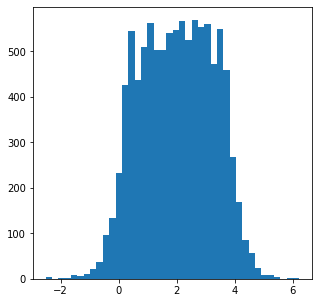

In [334]:
dt=0.25
b=0
c=4
lam=1
x=[2]
for i in range(10000):
  u=x[-1]
  dw=np.random.normal(0,sqrt(dt))
  u=u+dt*(-lam*(u-(b+c)/2))+dw*(lam*(u-b)*(c-u))**0.5
  x.append(u)
fig=plt.figure(figsize=(5,5))
ax1=plt.subplot(1,1,1)
ax1=plt.hist(x,40)
plt.show()


# Question 2

Generating this 2_D time series by decrete method:

$u_{m+1}=(-γ_m+iω)Δt+σ_uΔW+u_m$

$γ_{m+1}=-d_{γ}(γ_m-\hat{γ_m})Δt+σ_\gammaΔW+\gamma_m$

In [494]:
def TimeSeries(omega,sigmau,sigmay,dy,yb):
  dt=0.25
  U=[0]
  Y=[0]
  for i in range(3000):
    u,y=U[-1],Y[-1]
    np.random.seed()
    s0=np.random.normal(0,sqrt(dt))
    s1=np.random.normal(0,sqrt(dt))
    u=(-y+omega*1j)*u*dt+sigmau*s0+u
    y=-dy*(y-yb)*dt+sigmay*s1+y
    U.append(u)
    Y.append(y)
  return U

def get_real(lst):
  res=[]
  for i in range(len(lst)):
    res.append(np.real(lst[i]))
  return res
  



## a

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


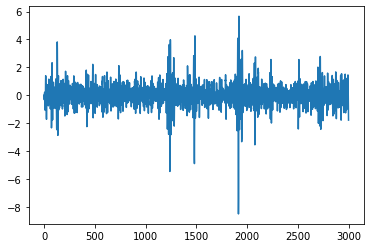

In [529]:
s=TimeSeries(2,0.7,0.5,0.6,1)
plt.plot(s)

## b

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


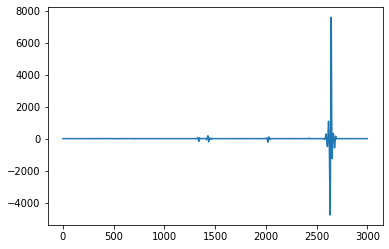

In [530]:
s=TimeSeries(1,0.3,0.8,0.5,0.5)
plt.plot(s)

## c

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


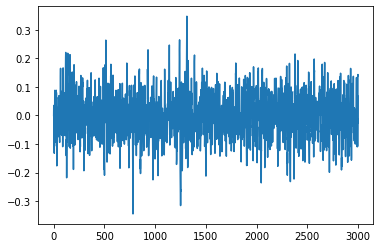

In [531]:
s=TimeSeries(1,0.1,0.5,0.6,1)
plt.plot(s)

# Question 3
## Section a
Model:

$u_{m+1}=u_m+(-au_m +f)Δt+σΔW=
(1-aΔt)u_m+fΔt+σΔW=Fu_n+\mathcal{F}_{m+1}+\sigma_{m+1}$

$\sigma_{m+1}\sim𝒩(0,\sigma^2Δt)$

$r=<\sigma_{m}^*\sigma_{m}>=\sigma^2Δt$

Let $a=f=1$ and $σ=0.5$.

Observation:

$v_{m+1}=u_{m+1}+\sigma_{m+1}^0$

$\sigma_{m+1}^0\sim𝒩(0,σ^0)$

$r^0=<\sigma_{m}^{0*}\sigma_{m}^0>=σ^0$

Let $σ^0=0.01$.


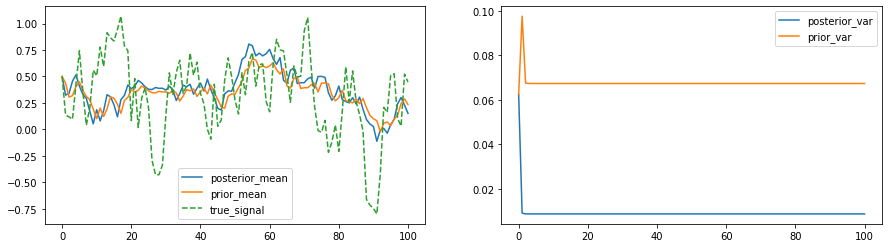

In [71]:
dt=0.25
F=1-dt
f=dt
a,b=0.5**2*dt,0.01
U=[0.5]
R=[a]
G=1
U0=[0.5]
U1,R1=[0.5],[a]
for i in range(100):
  u=U[-1]
  u0=U0[-1]
  r=R[-1]
  np.random.seed()
  sigma=np.random.normal(0,sqrt(a))
  u0=F*u0+sigma+f*dt
  u1=F*u+f*dt
  r1=F*r*F+a
  v=G*u+np.random.normal(0,sqrt(b))
  k=r1*G/(b+G**2*r1)
  u=u1+k*(v-G*u1)
  r=(1-k*G)*r1
  U1.append(u1)
  R1.append(r1)
  U.append(u)
  R.append(r)
  U0.append(u0)

  x=pd.DataFrame()
x['true_signal']=U0
x['posterior_mean']=U
x['prior_mean']=U1

x['posterior_var']=R
x['prior_var']=R1

fig=plt.figure(figsize=(15,4))
ax1,ax2=plt.subplot(1,2,1),plt.subplot(1,2,2)


ax1.plot(x['posterior_mean'],label='posterior_mean')
ax1.plot(x['prior_mean'],label='prior_mean')
ax1.plot(x['true_signal'],label='true_signal',linestyle='--')

ax2.plot(x['posterior_var'],label='posterior_var')
ax2.plot(x['prior_var'],label='prior_var')


ax1.legend()
ax2.legend()

fig.show()

## Section a

First step:

Generating the $u_n$ by follow equations:

Model:

$u_{m+1}=u_m+(-au_m +f_m)Δt+σΔW=
(1-aΔt)u_m+f_mΔt+σ_1ΔW$

$f_{m+1}=f_m$

We can denote it as:

\begin{equation}       
\left[                 
  \begin{array}{c}   
    u_{m+1} \\  
    f_{m+1} \\  
  \end{array}
\right]=
\left[                 
  \begin{array}{cc}   
    1-aΔt &Δt\\  
    0 &1\\  
  \end{array}
\right]
\left[                 
  \begin{array}{c}   
    u_m\\  
    f_m\\  
  \end{array}
\right]+𝛔      
\end{equation}

\begin{equation}       
𝛔\sim𝒩(\left[                 
  \begin{array}{c}   
    0\\  
    0\\  
  \end{array}
\right],
\left[                 
  \begin{array}{cc}   
    0.25Δt&0\\  
    0&0\\  
  \end{array}
\right])   
\end{equation}

Observation:

$v_{m+1}=gu_m+𝛔^0$
     
$𝛔^0\sim𝒩(0,0.01)$ 




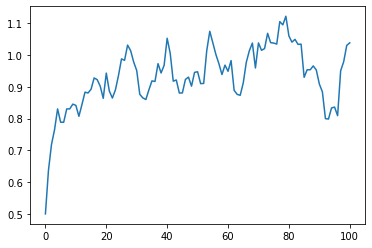

In [336]:
dt=0.25
a=1
F=[[1-a*dt,dt],[0,1]]
U=[np.array([0.5,1])]
R=[np.array([[0,0],[0,0]])]
G=np.array([1,0])
for i in range(100):
  u=U[-1]
  r=R[-1]
  np.random.seed()
  sigma=np.random.multivariate_normal([0,0],[[0.25*dt,0],[0,0]])
  u1=F@u
  r1=F@r@t(F)+[[0.25*dt,0],[0,0]]
  v=G@u+np.random.normal(0,0.1)
  # print(G@r1@t(G))
  k=G@r1/(G@r1@t(G)+0.1)
  u=u1+k*(v-G@u1)
  r=(np.identity(2)-k*G)@r1
  U.append(u)
  R.append(r)

def get_mean(lt,ind):
  s=[]
  for i in range(len(lt)):
    s.append(lt[i][ind])
  return s

u=get_mean(U,0)
plt.plot(u)

Second step:
Generating $f_m$ by follow equatoions:
$f_{m+1}=\frac{R_m}{\sigma^2}(u_{m+1}-u_m-(-au_m+f_m)Δt)+f_m$

$R_{m+1}=-\frac{R_m^2}{σ^2}Δt+R_m$

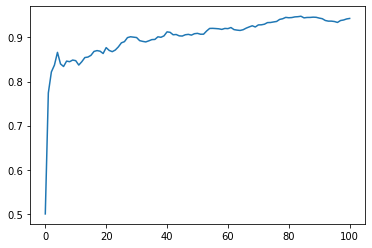

In [385]:

dt=0.25
F,R=[0.5],[0.5]
sigma2=0.5**2
for i in range(100):
  f=F[-1]
  r=R[-1]
  f=f+(r/sigma2)*(u[i+1]-u[i]-(-u[i]+f)*dt)
  r=r-(r**2/sigma2)*dt
  F.append(f)
  R.append(r)

plt.plot(F)

## Section c

$Δt\in \{0.1,0.2,0.3,0.4\}$

We can see it will converge slower as dt becomes bigger.



In [397]:
lst=[]
for i in range(1,5):
  dt=0.1*i
  F,R=[0.5],[0.5]
  sigma2=0.5**2
  for i in range(100):
    f=F[-1]
    r=R[-1]
    f=f+(r/sigma2)*(u[i+1]-u[i]-(-u[i]+f)*dt)
    r=r-(r**2/sigma2)*dt
    F.append(f)
    R.append(r)
  lst.append(F)

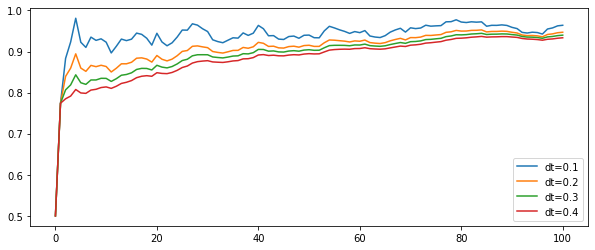

In [406]:
fig=plt.figure(figsize=(10,4))
ax1=plt.subplot(1,1,1)
for i in range(len(lst)):
  ax1.plot(lst[i],label='dt='+str(round(0.1*(i+1),2)))
ax1.legend()